In [25]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures
plt.style.use('fivethirtyeight')

**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [3]:
df = pd.read_csv('cleaned_data.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [4]:
df['default payment next month'].mean() # default payment next month - response variable

0.2217971797179718

In [5]:
df.groupby('default payment next month')['ID'].count() #1-default , 0- not default

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [13]:
lr_model = LogisticRegression()

In [14]:
lr_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
X=df['LIMIT_BAL'].values.reshape(-1,1)
y=df['default payment next month']

In [12]:
#Splitting the data into test and training data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [15]:
lr_model.fit(X_train , y_train) #Training the model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
lr_model.score(X_test , y_test)

0.78

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [17]:
pred= lr_model.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [19]:
#prediction probabilities comprising of 0 and 1 classes - > 0,1 respectively
pred_prob=lr_model.predict_proba(X_test)
pred_prob

array([[0.85704879, 0.14295121],
       [0.83932616, 0.16067384],
       [0.6343848 , 0.3656152 ],
       ...,
       [0.82981809, 0.17018191],
       [0.69563796, 0.30436204],
       [0.85704879, 0.14295121]])

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [20]:
from sklearn.metrics import roc_auc_score,roc_curve,precision_recall_curve


In [21]:
roc_auc_score(y_test,pred_prob[:,1]) # 

0.6170050717511655


**Now, plot the ROC curve.**


In [22]:
#Plotting the ROC curve
fpr , tpr , thres = roc_curve(y_test , pred_prob[:,1])

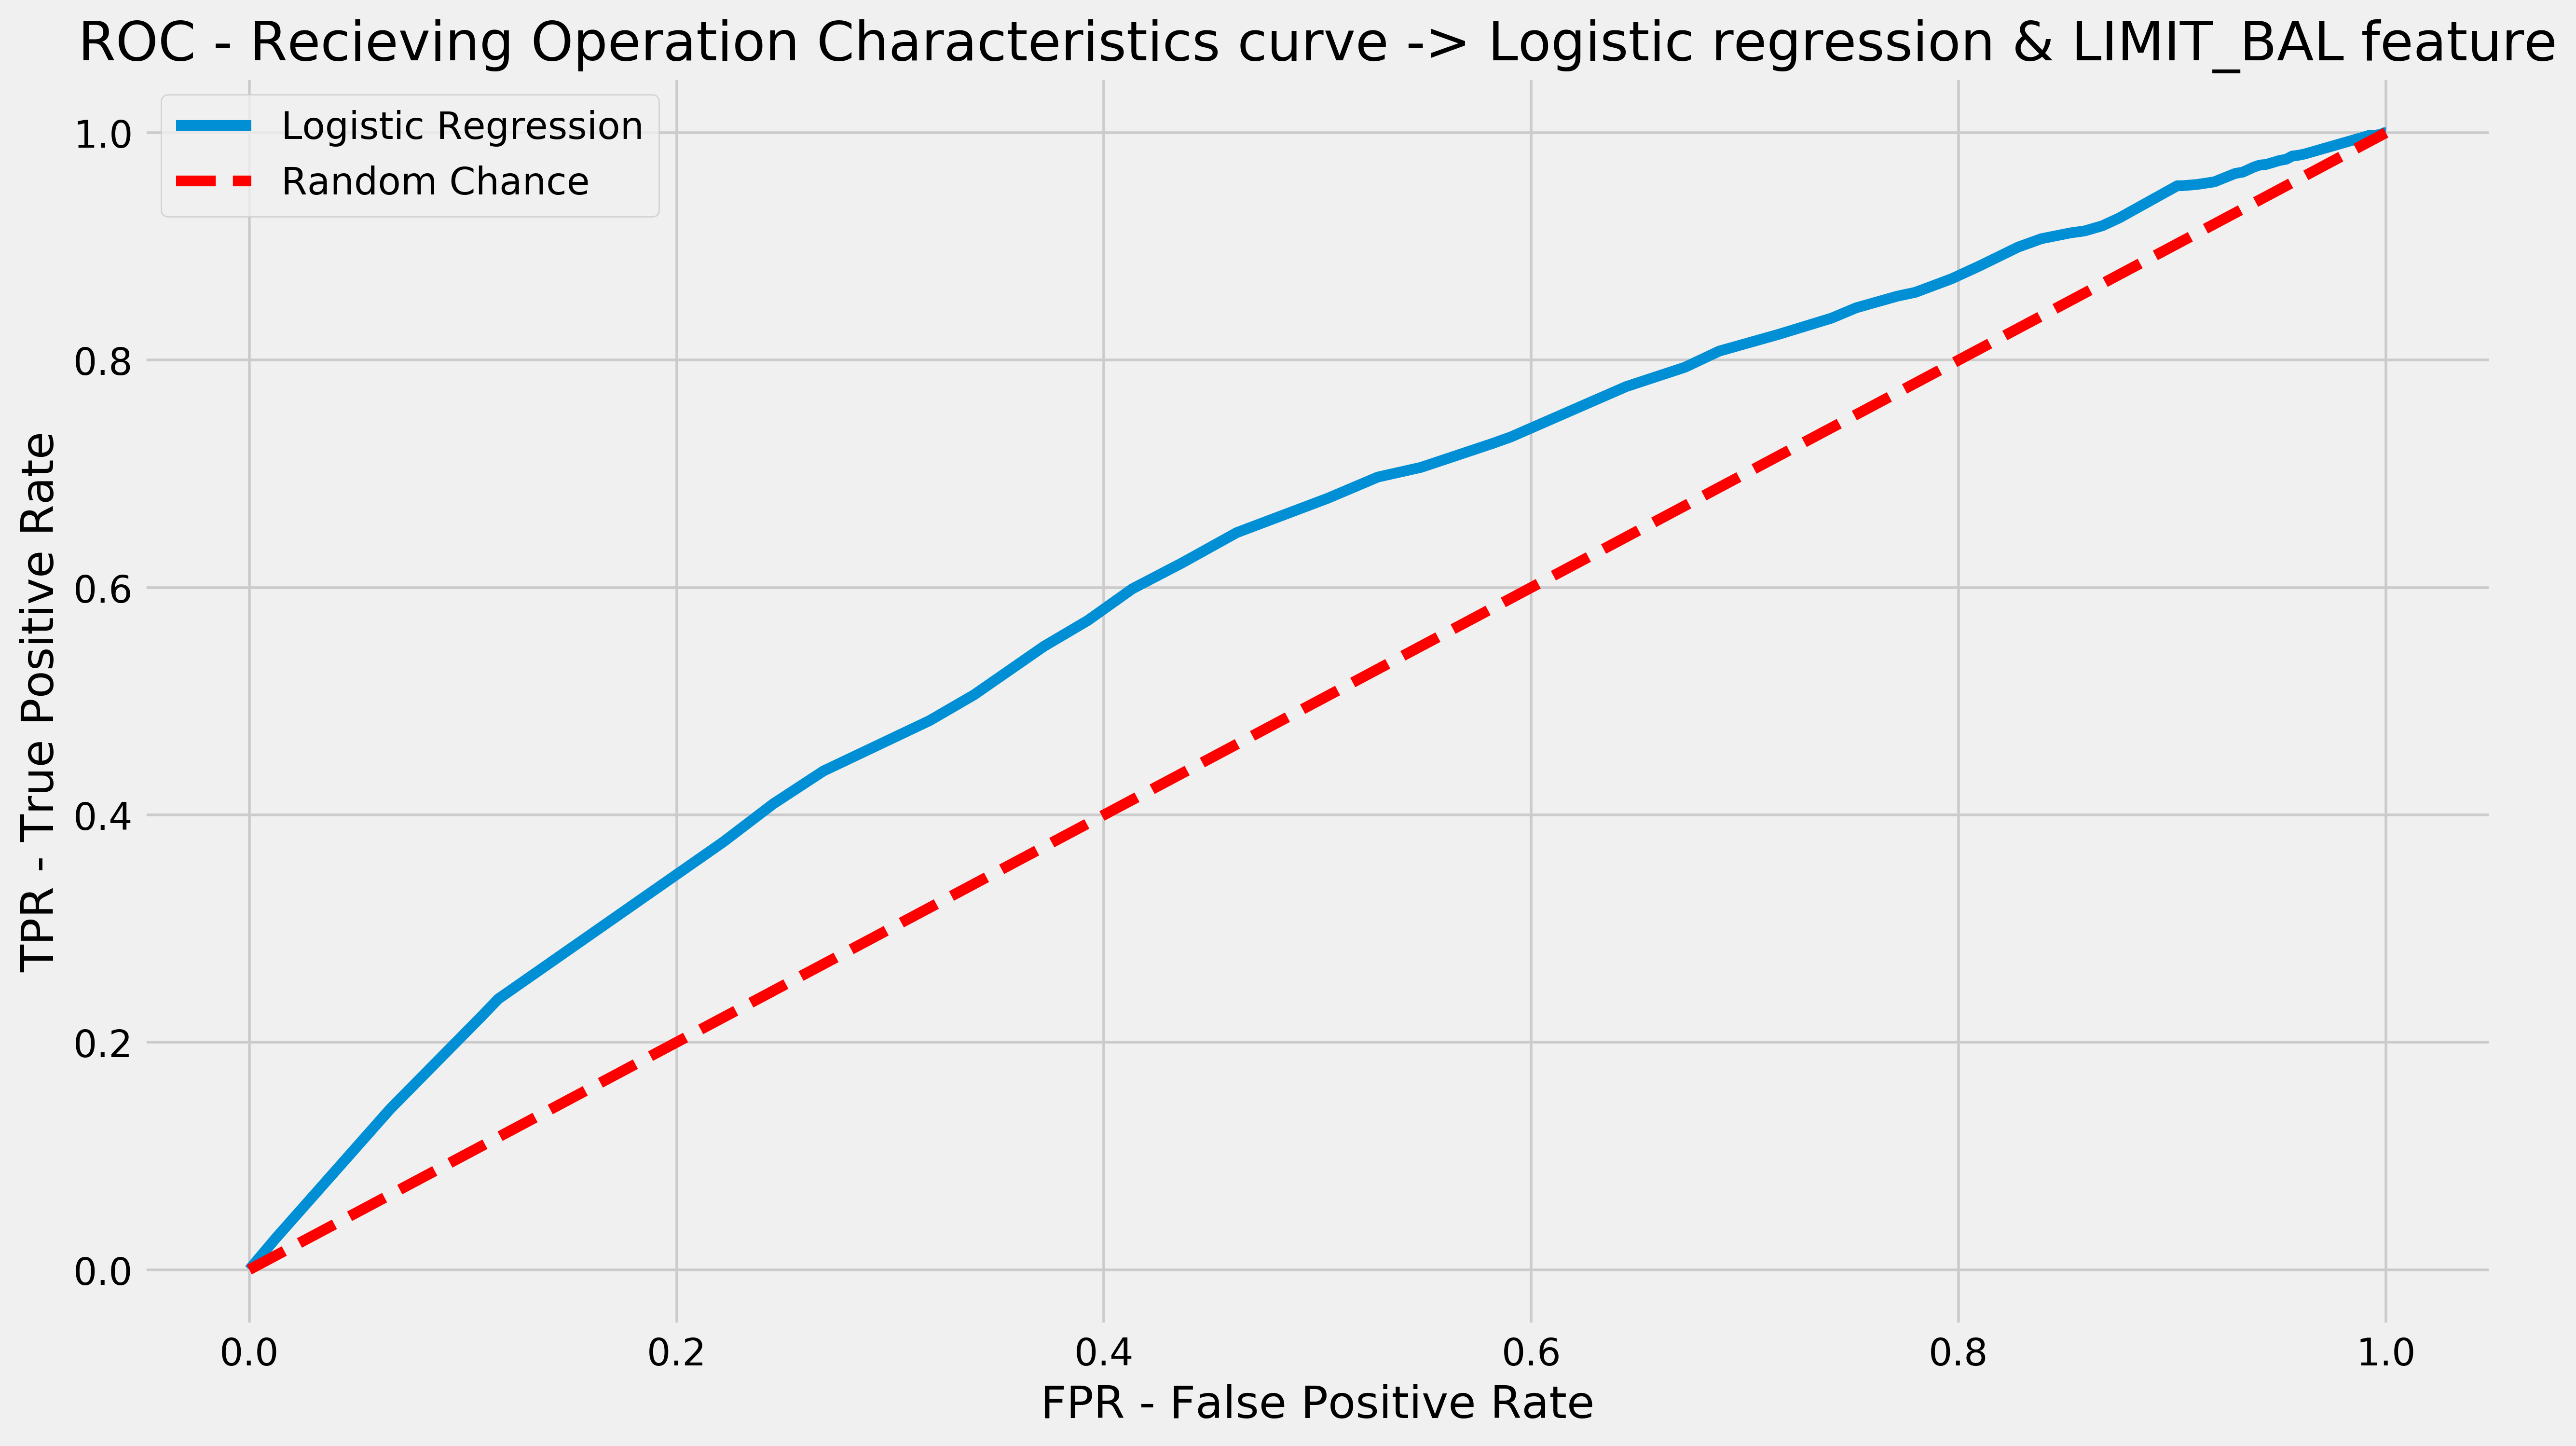

In [34]:
plt.figure(figsize=(14,8))
plt.plot(fpr,tpr,"-")
plt.plot([0,1],[0,1],'r--')

plt.xlabel('FPR - False Positive Rate')
plt.ylabel('TPR - True Positive Rate')
plt.title('ROC - Recieving Operation Characteristics curve -> Logistic regression & LIMIT_BAL feature')
plt.legend(['Logistic Regression','Random Chance'])

**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [28]:
from sklearn.metrics import precision_recall_curve,precision_score,precision_recall_fscore_support

In [30]:
precision,recall,thresh1=precision_recall_curve(y_test,pred_prob[:,1])


_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


Text(0.5, 1.0, 'Precision and recall Curve - >  logistic regression & LIMIT_BAL')

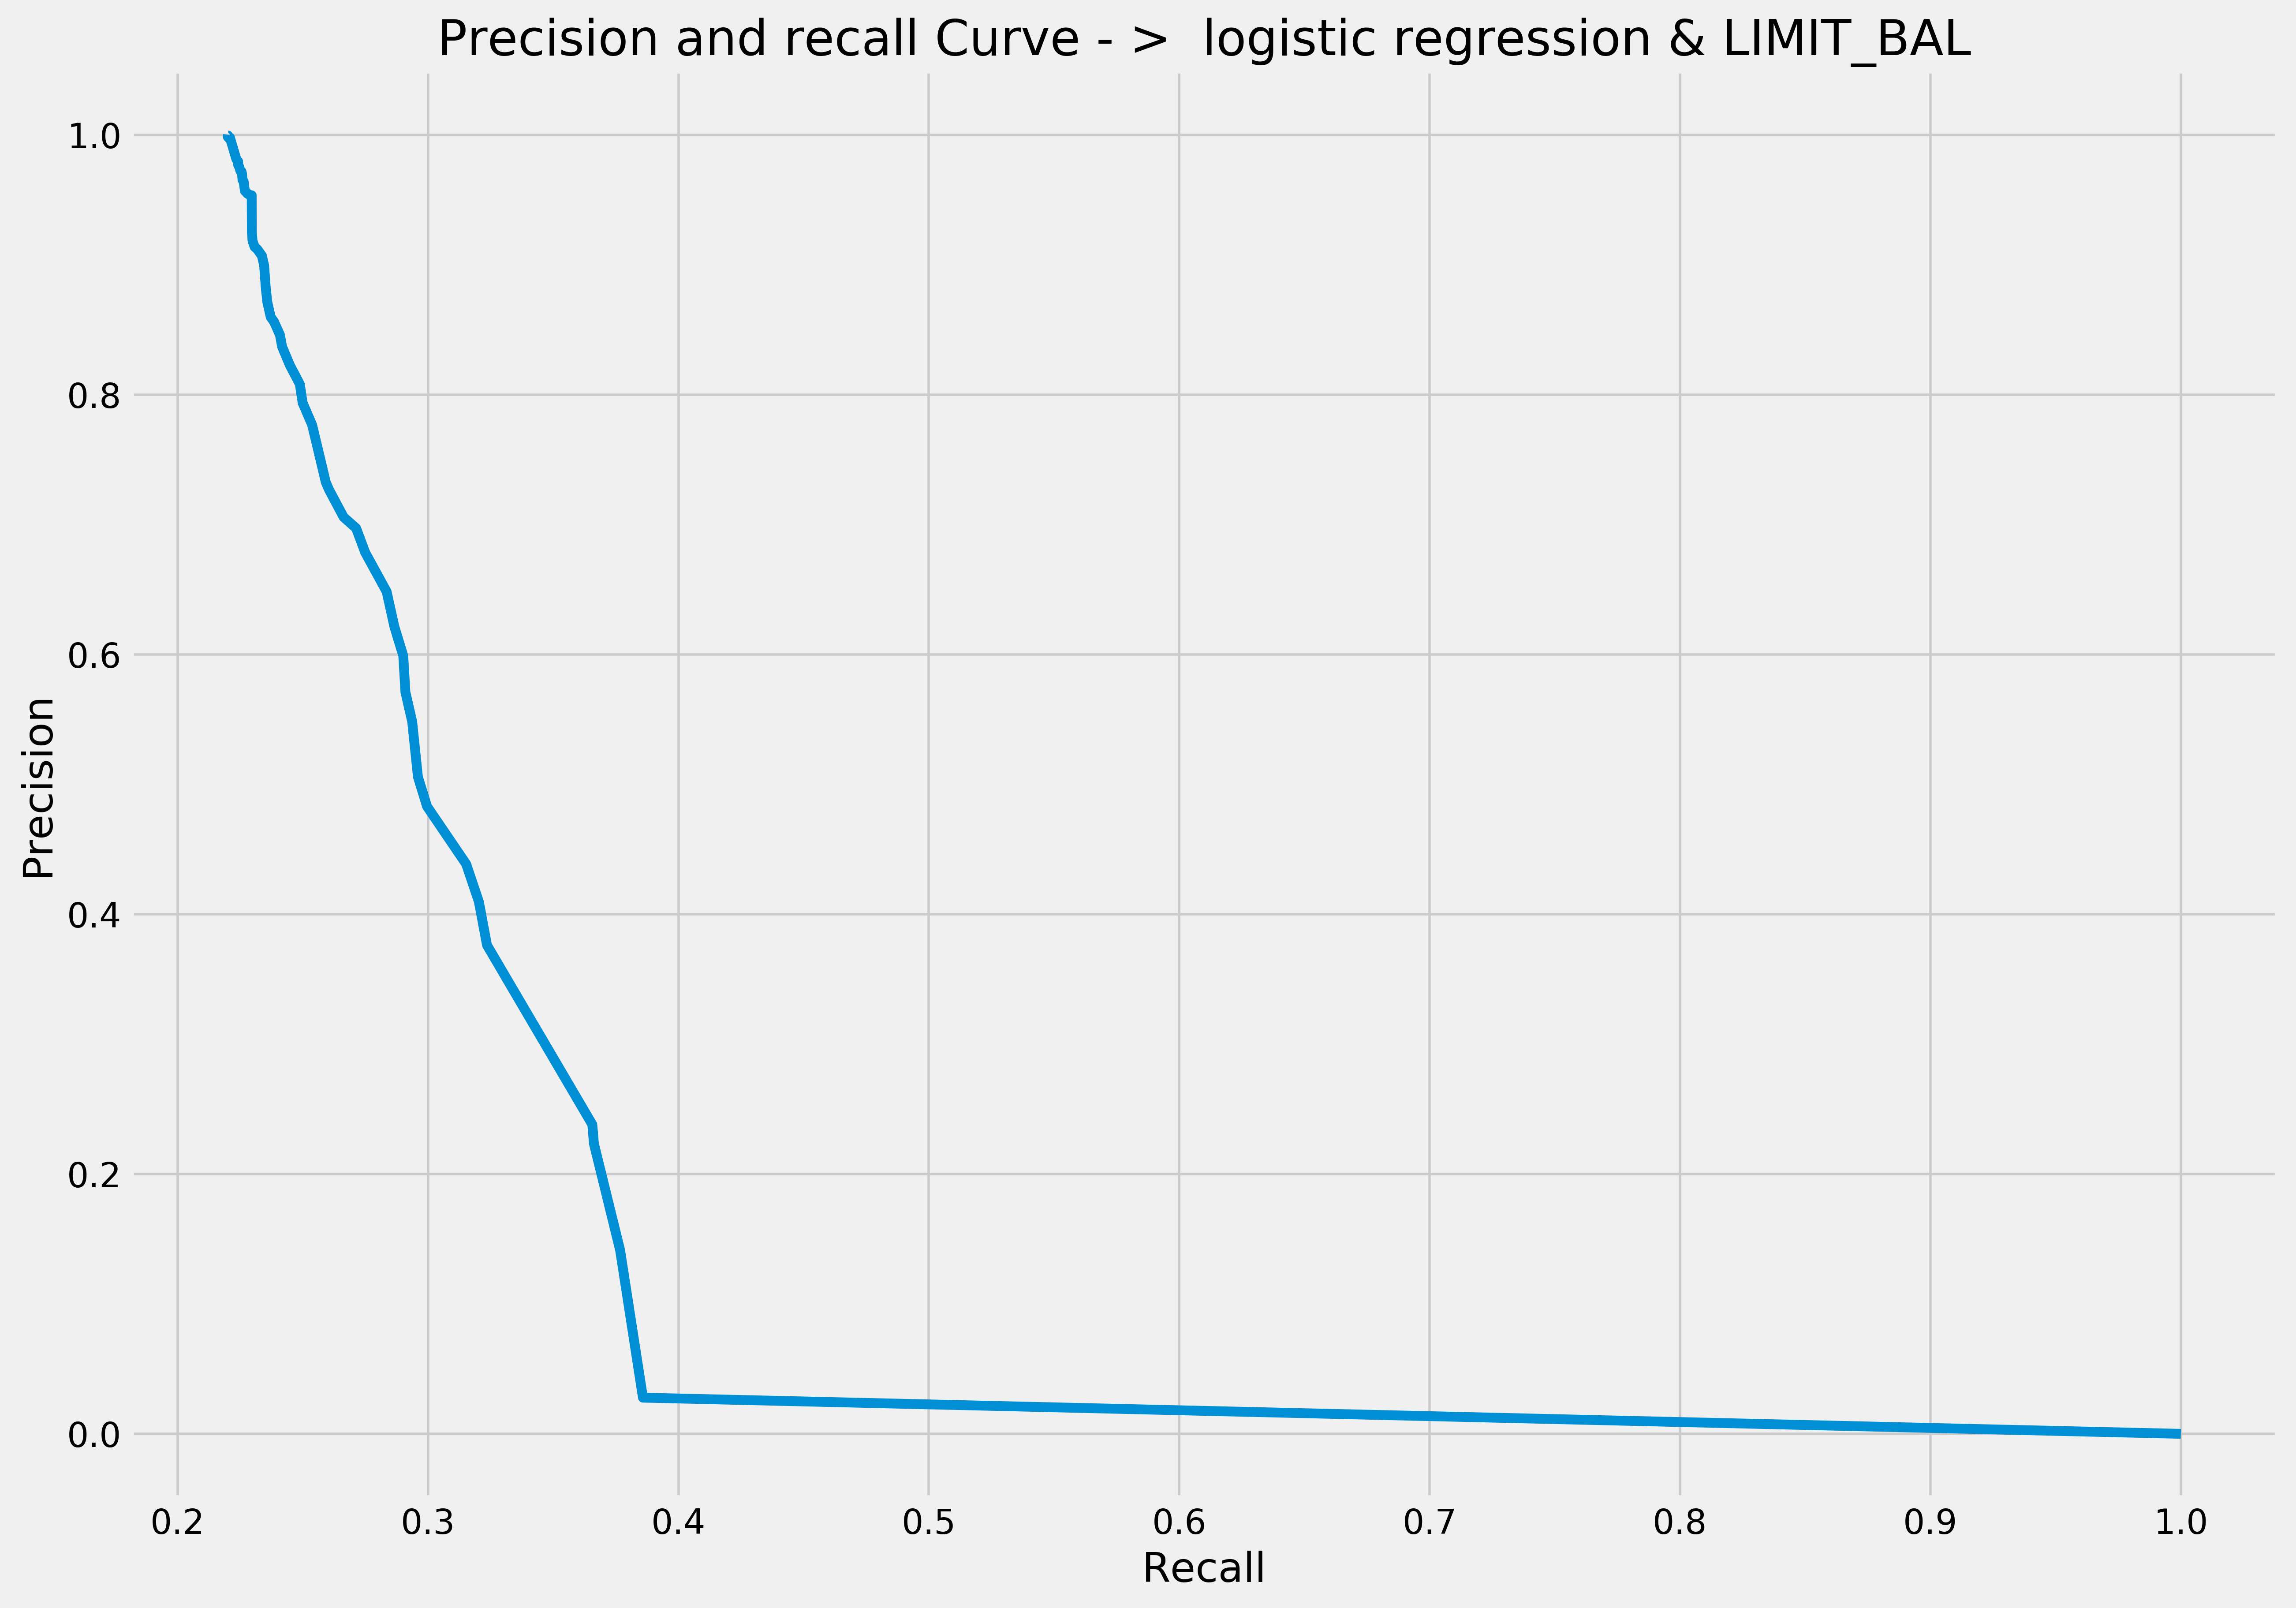

In [31]:
plt.figure(figsize=(14,10))
plt.plot(precision,recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision and recall Curve - >  logistic regression & LIMIT_BAL')

**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [32]:
from sklearn.metrics import auc

In [33]:
auc(recall , precision)

0.3147009000933155

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [37]:
#For Training Data :
xtrain_pred= lr_model.predict(X_train)
xtrain_pred_proba= lr_model.predict_proba(X_train)
xtrain_pred_proba #Prediction Probablities for classes 0,1 respectively

array([[0.58526414, 0.41473586],
       [0.61826488, 0.38173512],
       [0.79861906, 0.20138094],
       ...,
       [0.7755496 , 0.2244504 ],
       [0.75066247, 0.24933753],
       [0.79861906, 0.20138094]])

In [38]:
roc_auc_score(y_train,xtrain_pred_proba[:,1])


0.6193668918916676

    How is this different, conceptually and quantitatively, from your earlier calculation?
